In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from keras.datasets import mnist

import pickle

print "using ordering:", K.image_dim_ordering()

Using TensorFlow backend.


using ordering: tf


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print 'X_train shape:', X_train.shape
print X_train.shape[0], 'train samples'
print X_test.shape[0], 'test samples'

15286272/15296311 [============================>.] - ETA: 0sX_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [4]:
# number of classes
num_classes = 10

# image dimensions
img_rows, img_cols = X_train.shape[1],  X_train.shape[2]

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

print X_train.shape
print y_train.shape

(60000, 28, 28, 1)
(60000,)


(28, 28)
(60000,)


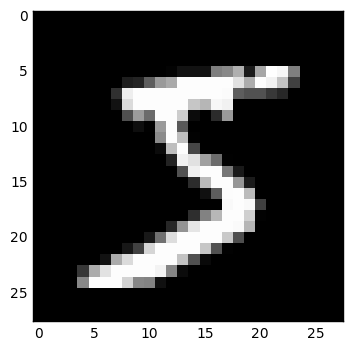

In [5]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 0

if K.image_dim_ordering() == 'th':
    img = X_train[img_num][0,:,:]
else:
    img = X_train[img_num][:,:,0]

print img.shape
print y_train.shape
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [6]:
# model hyperparameters
batch_size = 128
nb_epoch = 30

# network architecture
patch_size_1 = 5
patch_size_2 = 5

depth_1 = 20
depth_2 = 40

pool_size = 2

num_hidden_1 = 1000
num_hidden_2 = 1000

dropout = 0.5

In [7]:
# create new Keras Sequential model
model = Sequential()

# add first convolutional layer to model and specify it's depth and filter size
# for the first layer we also have to specify the size of each input image
# which we calculated above
model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
# apply 'relu' activation function for first layer
model.add(Activation('relu'))
# apply max pooling to reduce the size of the image by a factor of 2
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# repeat these operations for the second convolutional layer
# this time Keras can figure out the input size 
# from the previous layer on it's own
model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

# flatten the three-dimensional convolutional layer to a single layer of neurons
model.add(Flatten())

# add the first fully connected layer, applying 'relu' activation and dropout
model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# add the second fully connected layer
model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

# add the final classification layer with the number of neurons 
# matching the number of classes we are trying to learn
model.add(Dense(num_classes))

# apply the 'softmax' activation to the final layer to convert the output to 
# a probability distribution
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 42s - loss: 0.2915 - acc: 0.9078 - val_loss: 0.0639 - val_acc: 0.9794
Epoch 2/30
60000/60000 [==============================] - 42s - loss: 0.0792 - acc: 0.9755 - val_loss: 0.0394 - val_acc: 0.9861
Epoch 3/30
60000/60000 [==============================] - 45s - loss: 0.0567 - acc: 0.9829 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 4/30
60000/60000 [==============================] - 42s - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0266 - val_acc: 0.9916
Epoch 5/30
60000/60000 [==============================] - 43s - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0261 - val_acc: 0.9910
Epoch 6/30
60000/60000 [==============================] - 42s - loss: 0.0314 - acc: 0.9905 - val_loss: 0.0251 - val_acc: 0.9919
Epoch 7/30
60000/60000 [==============================] - 45s - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0282 - val_acc: 0.9913
Epoch 8/30
60000/60000 [==============================

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)

print 'Test score:', score[0]
print 'Test accuracy: {:.2%}'.format(score[1])

Test score: 0.0233515533706
Test accuracy: 99.38%
